# Clasificador de Vino Tinto y Vino Blanco

Para este proyecto voy a utilizar dos conjuntos de datos, los cuales están relacionados con variantes rojas y blancas del vino portugués "Vinho Verde". Cada set de datos se puede trabajar para clasificar la calidad del vino, pero al analizar los datos, no tenemos todas las clasificaciones de calidad (de 0 al 10), lo cual dificulta la utilización de múltiples modelos. Se opta por unir los dos conjuntos de datos para formar un set de datos el cual pueda clasificar vino tinto y blanco.

*Datos obtenidos en https://archive.ics.uci.edu/ml/datasets/wine+quality
P. Cortez, A. Cerdeira, F. Almeida, T. Matos y J. Reis. Modelar las preferencias del vino mediante la extracción de datos a partir de las propiedades fisicoquímicas. En Decision Support Systems, Elsevier, 47 (4): 547-553, 2009.*

## Cargar datos y librerías 

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import arange
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve

In [3]:
#set de datos vino blanco
white = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
#set de datos vino tinto 
red = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Crear columna Type of wine en ambos set de datos 

In [10]:
#crear columna tipo de vino blanco 
white['Type of wine'] = 'w'
white.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type of wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,w
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,w


In [11]:
#crear columna tio de vino tinto
red['Type of wine'] = 'r'
red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type of wine
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,r


### Concatenar los dos set de datos 

In [12]:
#concatenar set de datos
df = pd.concat([white, red], ignore_index=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type of wine
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,w
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,w
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,w
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,w
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,r
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,r
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,r
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,r


## Limpieza de datos

In [13]:
#Buscar datos faltantes:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type of wine            0
dtype: int64

No hay datos faltantes

In [14]:
#Buscar datos duplicados
df.duplicated().sum()

1177

Hay 1177 datos duplicados, lo cuales serán eliminados.

In [15]:
#Eliminar datos duplicados:
df = df.drop_duplicates()

In [16]:
#Ordenar índice para que queden de nuevo consecutivos.
df.reset_index(drop=True, inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type of wine
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,w
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,w
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,w
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,w
4,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,r
5316,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,r
5317,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,r
5318,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,r


### Trabajar datos categoricos en columna 'Type of wine' 

In [17]:
type_le = LabelEncoder() 
type_wine_labels = type_le.fit_transform(df['Type of wine']) 
type_mappings = {index: label for index, label in enumerate(type_le.classes_)}
type_mappings

{0: 'r', 1: 'w'}

In [18]:
df['Type_wine_labels'] = type_wine_labels

C:\Users\chile\AppData\Local\Temp/ipykernel_6300/2780273318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type_wine_labels'] = type_wine_labels


In [19]:
#Correlación entre las columnas
df.corr().sort_values(by = ['Type_wine_labels'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type_wine_labels
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205,-0.645335
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137,-0.499517
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884,-0.490364
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092,-0.486253
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434,-0.429377
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733,-0.310919
alcohol,-0.102573,-0.065411,-0.005496,-0.305242,-0.269601,-0.170012,-0.249004,-0.667811,0.097314,-0.017232,1.000000,0.469422,0.057756
quality,-0.080092,-0.265205,0.097954,-0.056830,-0.202137,0.054002,-0.050296,-0.326434,0.039733,0.041884,0.469422,1.000000,0.114809
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954,0.183759
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830,0.328695


<AxesSubplot:>

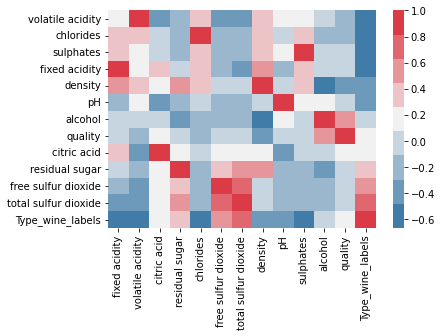

In [20]:
# Visualización de la correlación a través de un mapa de calor
sns.heatmap(df.corr().sort_values(by = ['Type_wine_labels']), cmap = sns.diverging_palette(240, 10, n=9))

## Visualizaciones

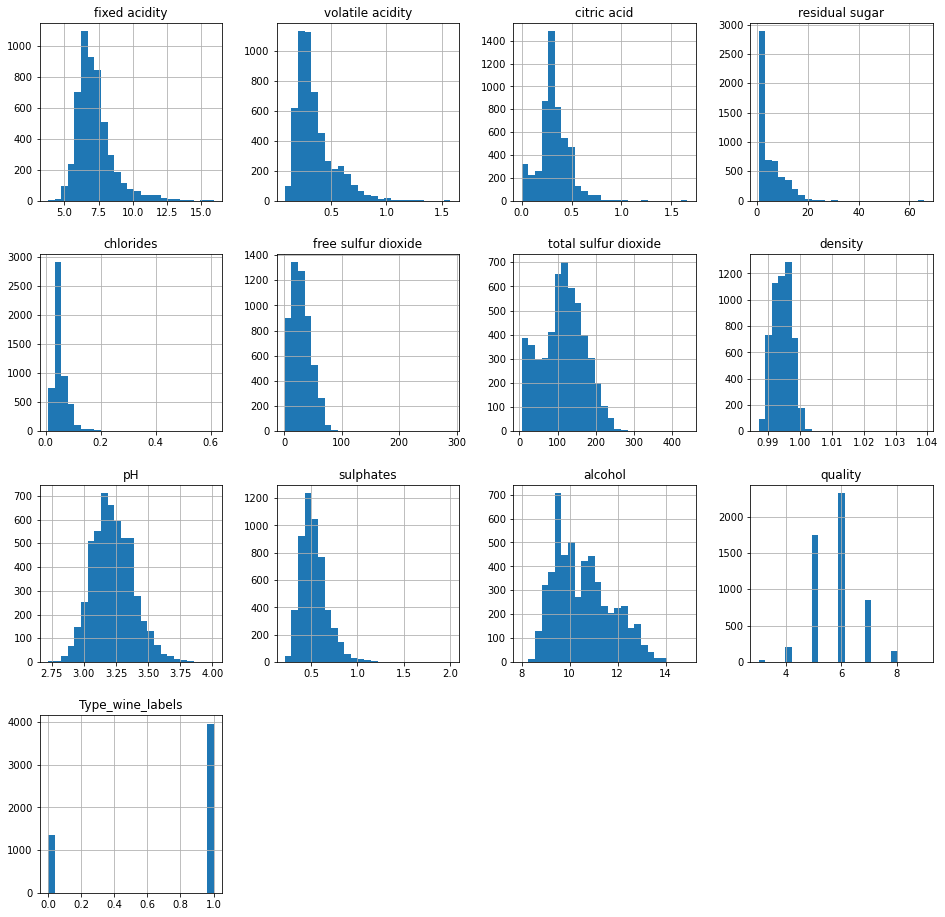

In [21]:
# graficar histogramas por columnas para ver comportamiento de los datos
df.loc[:,:].hist(bins=25,
                 figsize=(16,16));

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type_wine_labels
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [23]:
#Filtros
type_white = df['Type of wine'] == 'w'
white_wine = df.loc[type_white,:]
red_wine = df.loc[~type_white,:]

C:\Users\chile\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chile\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chile\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

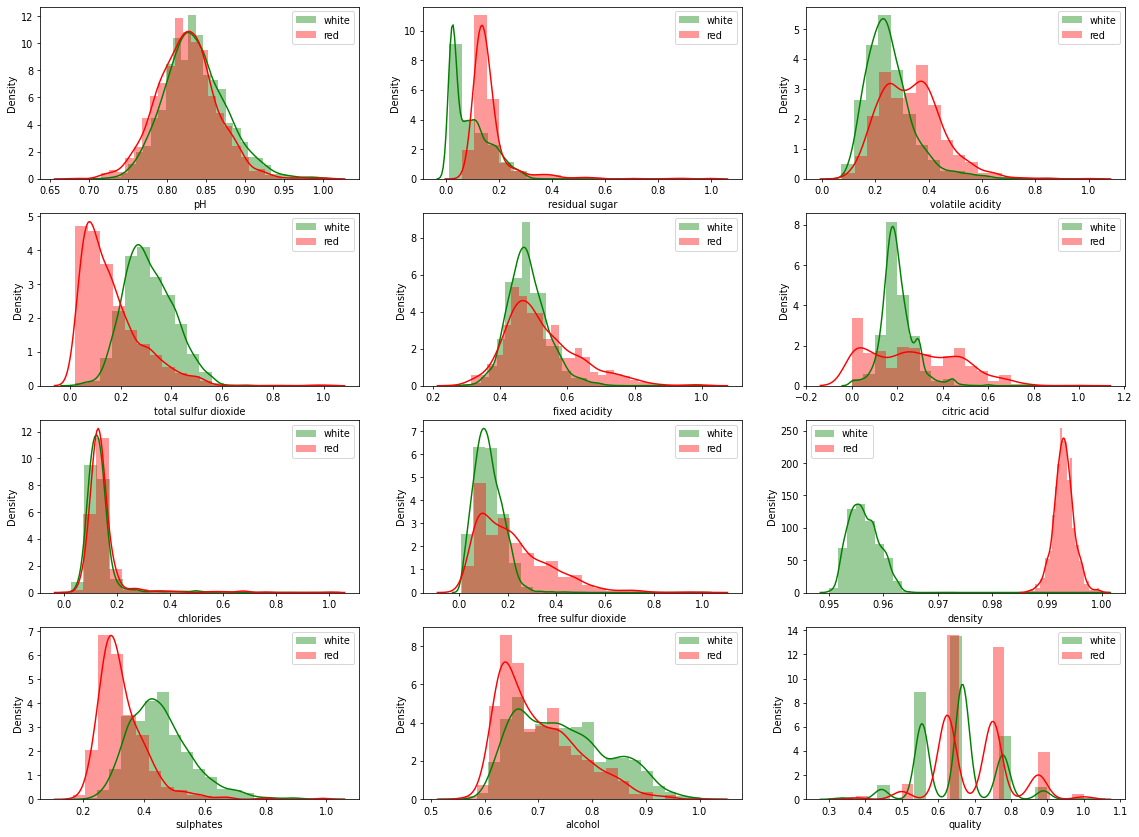

In [24]:
fig = plt.figure(figsize=(20,15), dpi=70)
#Grafico
plt.subplot(4, 3, 1);
sns.distplot(white_wine['pH']/white_wine['pH'].max(), label= 'white',bins = 30, color= 'green')
sns.distplot(red_wine['pH']/red_wine['pH'].max(), label= 'red',bins = 30, color = 'red')
plt.legend()

plt.subplot(4, 3, 2);
sns.distplot(white_wine['residual sugar']/white_wine['residual sugar'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['residual sugar']/red_wine['residual sugar'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

plt.subplot(4, 3, 3);
sns.distplot(white_wine['volatile acidity']/white_wine['volatile acidity'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['volatile acidity']/red_wine['volatile acidity'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

plt.subplot(4, 3, 4);
sns.distplot(white_wine['total sulfur dioxide']/white_wine['total sulfur dioxide'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['total sulfur dioxide']/red_wine['total sulfur dioxide'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

plt.subplot(4, 3, 5);
sns.distplot(white_wine['fixed acidity']/white_wine['fixed acidity'].max(), label= 'white',bins = 30, color= 'green')
sns.distplot(red_wine['fixed acidity']/red_wine['fixed acidity'].max(), label= 'red',bins = 30, color = 'red')
plt.legend()

plt.subplot(4, 3, 6);
sns.distplot(white_wine['citric acid']/white_wine['citric acid'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['citric acid']/red_wine['citric acid'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

plt.subplot(4, 3, 7);
sns.distplot(white_wine['chlorides']/white_wine['chlorides'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['chlorides']/red_wine['chlorides'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

plt.subplot(4, 3, 8);
sns.distplot(white_wine['free sulfur dioxide']/white_wine['free sulfur dioxide'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['free sulfur dioxide']/red_wine['free sulfur dioxide'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

plt.subplot(4, 3, 9);
sns.distplot(white_wine['density']/white_wine['density'].max(), label= 'white',bins = 30, color= 'green')
sns.distplot(red_wine['density']/red_wine['density'].max(), label= 'red',bins = 30, color = 'red')
plt.legend()

plt.subplot(4, 3, 10);
sns.distplot(white_wine['sulphates']/white_wine['sulphates'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['sulphates']/red_wine['sulphates'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

plt.subplot(4, 3, 11);
sns.distplot(white_wine['alcohol']/white_wine['alcohol'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['alcohol']/red_wine['alcohol'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

plt.subplot(4, 3, 12);
sns.distplot(white_wine['quality']/white_wine['quality'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['quality']/red_wine['quality'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

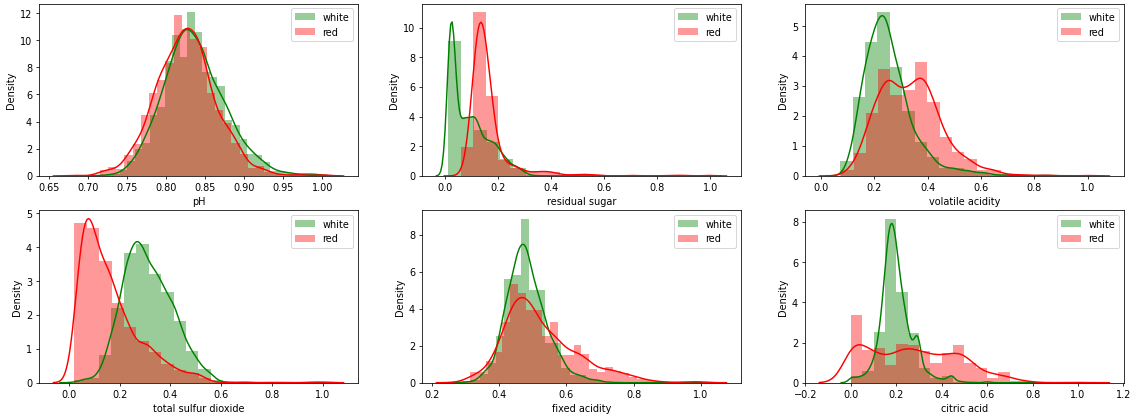

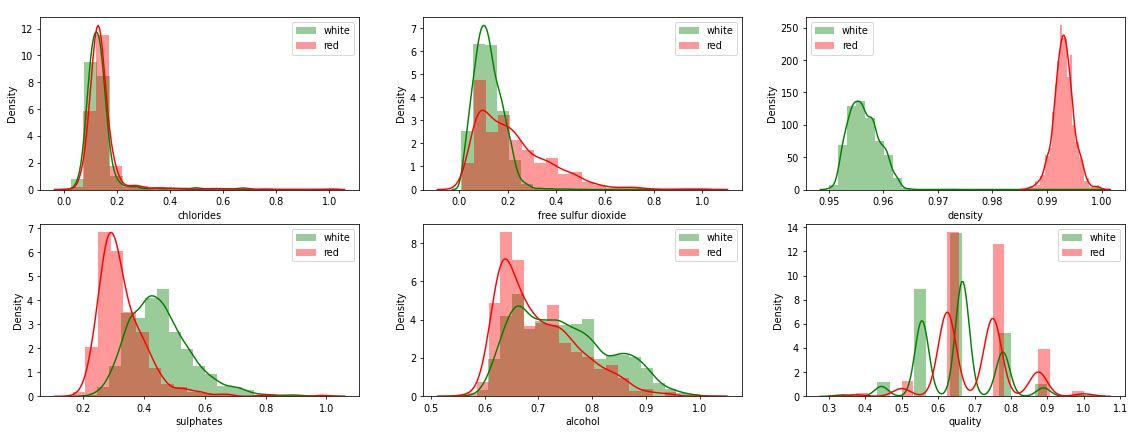

Al observar estos gráficos de comparación de distribución de los datos de vino tinto v/s vino blanco, se puede ver que la mayoría de las columnas presentan diferencias, por lo que se puede utilizar este set de datos para clasificar vino tinto y vino blanco.

## Modelos de predicción

In [25]:
#Ver que tan balanceados están los datos
df['Type_wine_labels'].value_counts()

1    3961
0    1359
Name: Type_wine_labels, dtype: int64



> Datos desbalanceados



In [26]:
#Matriz de características y el vector de destino
X = df.drop(columns=['Type of wine', 'Type_wine_labels'])
y = df['Type_wine_labels']

In [27]:
X.shape

(5320, 12)

In [28]:
y.shape

(5320,)

In [29]:
#Separar datos para entrenamiento y prueba, utilizar stratify para compensar desbalanceo de datos.  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, stratify=y)

In [30]:
# Estandarizar datos
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar  transform tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Precisión nula al predecir la clase más frecuente
y_train.value_counts(normalize= True)

1    0.744612
0    0.255388
Name: Type_wine_labels, dtype: float64



> 0.74 es lo más bajo que podemos obtener de nuestro modelo, ya que este resultado es si lo hiciera de forma aleatoria.



### KNN Clasificador 

In [32]:
knn = KNeighborsClassifier()

In [33]:
knn.fit(X_train, y_train)
print('Test accuracy:', knn.score(X_test, y_test))

Test accuracy: 0.9924812030075187


### Random Forests

A continuación voy a utilizar un for para ver cuál es el número de estimadores que nos da un mayor score (Fuente: Material de la plataforma del Bootcamp)

In [34]:
#Lista con distintos números de estimadores
estimator_range = [1] + list(range(10, 150, 5))

In [35]:
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
# Usar división entrenamiento prueba con cada valor de n_estimators
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator,
                                 random_state=3)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

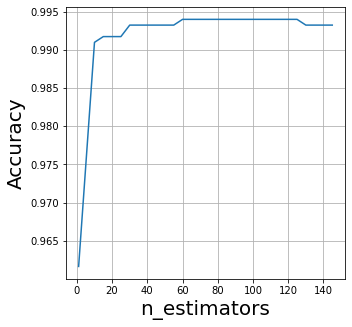

In [36]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()



> El número de estimador que da un score mayor es 60.



In [37]:
rf = RandomForestClassifier(n_estimators=60,random_state= 3)

In [38]:
rf.fit(X_train, y_train)
print('Test accuracy:', rf.score(X_test, y_test))

Test accuracy: 0.9939849624060151


### Regresion Logistica

A continuación, voy a utilizar GridSearchCV para ver cuáles son los mejores parámetros para la regresión logística.

In [39]:
parametros = {'penalty': ['l1', 'l2'],
          'C': [0.0001, .001, .01, .1, 1, 10, 100],
          'class_weight': [None, 'balanced']}

In [40]:
log_reg = LogisticRegression(solver = 'liblinear')

gs = GridSearchCV(log_reg, parametros)
gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']})

In [41]:
gs.best_estimator_

LogisticRegression(C=10, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [42]:
print('Test accuracy:', gs.score(X_test, y_test))

Test accuracy: 0.9909774436090225


> Conclusión: El mejor modelo fue el RandomForestClassifier, ya que es el que nos da un mayor valor en el score.

### Métricas para el modelo RandomForestClassifier

In [43]:
#valores de predicción
preds = rf.predict(X_test)

In [44]:
#Matriz de confusión 
tn, fp, fn, tp =  confusion_matrix(y_test, preds).ravel()

<AxesSubplot:>

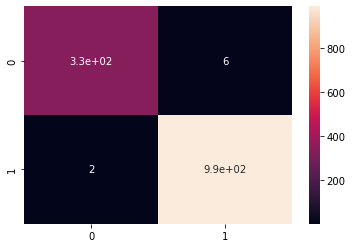

In [45]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True)

In [46]:
#Sensibilidad 
sensitivity = tp/ (tp + fn)
print(sensitivity)

0.997979797979798


In [47]:
#Precisión 
precision = tp / (tp + fp)
print(precision)

0.993963782696177


In [48]:
#Especificidad:
specificity = tn / ( tn + fp)
print( specificity)

0.9823529411764705


In [49]:
#AUC ROC
roc_auc_score(y_test, rf.predict(X_test))

0.9901663695781342

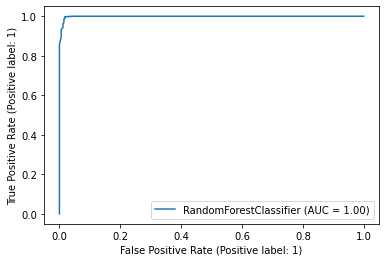

In [50]:
#Grafico de la curva de ROC
plot_roc_curve(rf, X_test, y_test)

### Conclusiones 

> A pesar del desbalanceo de los datos, se puede observar, según los resultados de las métricas, que el modelo de predicción escogido clasifica en un 98% aprox. tanto los vinos blancos como los vinos tintos, por lo que se puede concluir que es un buen modelo de predicción. 